In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix,classification_report
mnist=fetch_openml('mnist_784')
# mnist.head()

In [51]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


In [52]:
inputdata,y=mnist['data'],mnist['target']

In [53]:
inputdata/=255
nDigits=10
#Taking rows form y.shape[] and 10 columns form nDigits
yonehot=np.zeros([y.shape[0],nDigits])
yonehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
for i in range(y.shape[0]):
    yonehot[i,int(y[i])]=1
y=yonehot
# m=60000
# m=inputdata.shap

In [55]:
m=60000
m_test=inputdata.shape[0]-m
y_train, y_test = y[:m,:].reshape(m,nDigits), y[m:,:].reshape(m_test,nDigits)
InputData_train, InputData_test = inputdata[:m,:], inputdata[m:,:]
np.random.seed(1002)

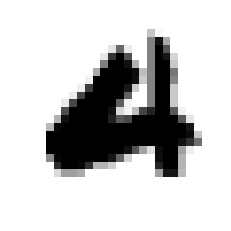

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [59]:
# Show a random input

i = 1030
plt.imshow(InputData_train[i,:].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[i,:])

In [62]:
# Define activation, loss, and their derivatives

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z):
    return z * (1-z)

def relu (x):
    return np.maximum(0,x) # ReLU to find maximum

def relu_derivative(x):
    return 0.5 * (np.sign(x)+1) # ReLU derivative is either zero or 1.

def CrossEntropyLoss(y, y_hat):
    L_sum = np.sum(np.multiply(y, np.log(y_hat)))
    m = y.shape[1]
    L = -(1/m) * L_sum

    return L

def softmax(y):
    return np.exp(y) / np.sum(np.exp(y), axis=0)

def CE_Softmax_Derivative(output, ideal_output):
    return output - ideal_output

In [79]:
inputDim = InputData_train.shape[1]
nHidden = 128
learning_rate = 1
weight_decay = 0.001

W1 = 0.01*np.random.randn(nHidden, inputDim)
b1 = np.zeros((nHidden, 1))
W2 = 0.01*np.random.randn(nDigits, nHidden)
b2 = np.zeros((nDigits, 1))

inputData = InputData_train
y = y_train

Epoch 0 cost:  2.3006566369090677
Epoch 10 cost:  1.1220063252348138
Epoch 20 cost:  1.4691605656733993
Epoch 30 cost:  0.8533531881710671
Epoch 40 cost:  0.7686685497923357
Epoch 50 cost:  0.45271548170579257
Epoch 60 cost:  0.3632178379475061
Epoch 70 cost:  0.3398619789976706
Epoch 80 cost:  0.3115160868648074
Epoch 90 cost:  0.29601266350705824


<function matplotlib.pyplot.show(*args, **kw)>

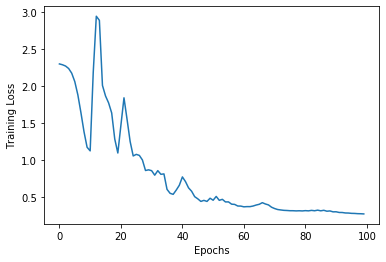

In [80]:
nEpochs = 100
costPlot = np.zeros(nEpochs)

for i in range(nEpochs):

    Z1 = np.matmul(W1,inputData.T) + b1
    A1 = relu(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = softmax(Z2)

    cost = CrossEntropyLoss(y.T, A2)
    costPlot[i] = cost

    dZ2 = CE_Softmax_Derivative(A2,y.T)
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1./m) * np.matmul(dZ1, inputData)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 -= learning_rate * dW2 + weight_decay * W2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1 + weight_decay * W1
    b1 -= learning_rate * db1
    
    if (i % 10 == 0):
        print("Epoch", i, "cost: ", cost)
    
plt.plot(costPlot)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show

In [81]:
Z1 = np.matmul(W1, InputData_test.T) + b1
A1 = relu(Z1)
Z2 = np.matmul(W2, A1) + b2

predictions = np.argmax(Z2, axis=0)
labels = np.argmax(y_test.T, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 963    0   11    2    1   11   10    3    7   12]
 [   0 1114    7    0    1    2    3   10   12    7]
 [   2    3  934   20    6    5    3   30   11    3]
 [   2    4   10  937    0   40    0    3   32   11]
 [   0    1   15    0  918    5   14    7   10   41]
 [   5    0    1   22    0  794   11    0   26    8]
 [   6    3   15    2   15   13  915    0   15    0]
 [   1    2   18   13    2    4    0  955   14   23]
 [   1    8   19    8    3   10    2    1  832    2]
 [   0    0    2    6   36    8    0   19   15  902]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1020
           1       0.98      0.96      0.97      1156
           2       0.91      0.92      0.91      1017
           3       0.93      0.90      0.91      1039
           4       0.93      0.91      0.92      1011
           5       0.89      0.92      0.90       867
           6       0.96      0.93      0.94       984
           7       0.93      0.93   